In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeClassifier,Ridge
from sklearn.model_selection import cross_val_score
import warnings
pd.options.display.max_columns = 200
plt.rcParams['figure.figsize'] = (20, 12)

In [2]:
train = pd.read_csv(r"C:\Users\scott\Desktop\dankook_dacon\dataset\train.csv")
test = pd.read_csv(r"C:\Users\scott\Desktop\dankook_dacon\dataset\test.csv")

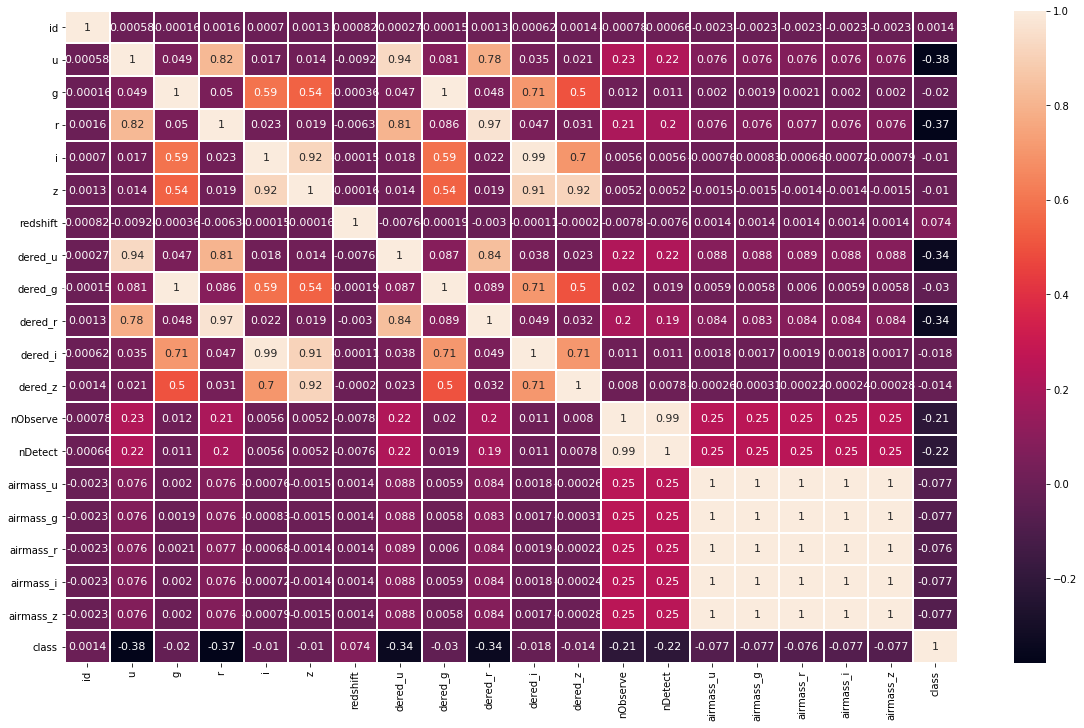

In [3]:
sns.heatmap(train.corr(), annot = True, annot_kws = {"size":11}, linewidths = 1)

In [4]:
train.describe()

id              u              g              r  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean   159999.500000      19.852429      18.376837      17.735761   
std     92376.187408       1.945548      31.110759       1.466242   
min         0.000000     -17.687512  -17555.365606       7.731354   
25%     79999.750000      18.724150      17.474851      16.877190   
50%    159999.500000      19.419439      18.140528      17.525850   
75%    239999.250000      20.432092      19.073172      18.428089   
max    319999.000000      58.623328      46.338272      72.009662   

                   i              z       redshift        dered_u  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean       17.174226      16.875187       0.058308      19.628874   
std        52.561464      57.146264       0.575457       1.923586   
min    -23955.817764  -23955.817764    -166.048260     -42.837530   
25%        16.523876      16.288890       0.000036      18.563598   
50%        17.149736      16.917610       0.047129      19.264635   
75%        18.007435      17.728924       0.094597      20.197603   
max        50.164052      52.612664      62.323343      30.777850   

             dered_g        dered_r        dered_i        dered_z  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean       18.227087      17.615434      17.152347      16.869277   
std        17.786568       1.473020      25.075760      35.436549   
min     -9999.000000     -16.380230   -9999.000000   -9999.000000   
25%        17.348370      16.787138      16.453048      16.234063   
50%        18.022410      17.443415      17.087370      16.869390   
75%        18.888443      18.291078      17.906960      17.655653   
max        30.613170      31.957200      32.016220      30.781270   

            nObserve        nDetect      airmass_u      airmass_g  \
count  320000.000000  320000.000000  320000.000000  320000.000000   
mean        6.332700       6.138816       1.175763       1.176528   
std         8.881129       8.551634       0.116297       0.118065   
min         1.000000       1.000000       1.000059       1.000012   
25%         1.000000       1.000000       1.088220       1.088448   
50%         2.000000       2.000000       1.179350       1.179235   
75%         5.000000       5.000000       1.227540       1.225990   
max        44.000000      42.000000       2.050775       2.080287   

           airmass_r      airmass_i      airmass_z          class  
count  320000.000000  320000.000000  320000.000000  320000.000000  
mean        1.175131       1.175430       1.176128       1.116322  
std         0.114723       0.115485       0.117156       0.923455  
min         1.000157       1.000105       1.000027       0.000000  
25%         1.087763       1.088021       1.088299       0.000000  
50%         1.179375       1.179377       1.179303       1.000000  
75%         1.229236       1.228599       1.226757       2.000000  
max         2.022134       2.036329       2.065390       2.000000

In [5]:
# 이상치 제거 1 - 분포

# train = train.drop(train[ (train["u"] < -12) | (train["u"] > 50)].index) 
# train = train.drop(train[ (train["g"] > 40) | (train["g"]<2)].index)
# train = train.drop(train[ train["r"] > 40].index)
# train = train.drop(train[ (train["i"] < 10) | (train["i"]>40)].index)
# train = train.drop(train[ (train["z"] < -0) | (train["z"]>50)].index)

# train = train.drop(train[train["dered_u"] < -5].index)
# train = train.drop(train[ (train["dered_i"] < 10) | (train["dered_i"] > 30)].index)
# train = train.drop(train[train["dered_z"] > 30].index)


# sns.boxplot(train["class"], train["g"])
# sns.countplot(train["nObserve"], hue = train["class"])

# # 이상치 제거 2 - 상관도
# train = train.drop(train[(train["g"] > 80) | (train["g"] < 5)].index)
# train = train.drop(train[train["dered_u"] < 5].index)
# train = train.drop(train[train["redshift"] < -100].index)
# train = train.drop(train[train["z"] > 6000].index)
# train = train.drop(train[train["r"] > 38].index)
# train = train.drop(train[(train["redshift"] < -40) & (train["nObserve"] > 5)].index)

# sns.scatterplot(train["u"], train["z"])


In [6]:
alldata = pd.concat([train,test])

alldata["u-g"] = alldata["u"]-alldata["g"]
alldata["g-r"] = alldata["g"]-alldata["r"]
alldata["r-i"] = alldata["r"]-alldata["i"]
alldata["i-z"] = alldata["i"]-alldata["z"]

alldata["d1"] = alldata["dered_u"]-alldata["dered_g"]
alldata["d2"] = alldata["dered_g"]-alldata["dered_r"]
alldata["d3"] = alldata["dered_r"]-alldata["dered_i"]
alldata["d4"] = alldata["dered_i"]-alldata["dered_z"]

alldata["1-color"] = -0.436 * alldata["u"] + 1.129 * alldata["g"] - 0.119 * alldata["r"] - 0.574 * alldata["i"] + 0.1984
alldata["s-color"] = -0.249 * alldata["u"] + 0.794 * alldata["g"] - 0.555 * alldata["r"] + 0.234
alldata["p1s"] = 0.91 * (alldata["u"] - alldata["g"]) + 0.415 * (alldata["g"] - alldata["r"]) - 1.280
alldata["c1"] = (alldata["r"] - alldata["i"]) - (alldata["g"] - alldata["r"]) / 4 - 0.177
alldata["c2"] = 0.7 * (alldata["g"] - alldata["r"]) + 1.2 * (alldata["r"] - alldata["i"] - 0.177)

alldata

id          u          g          r          i          z  \
0           0  23.263956  20.336773  19.009500  17.672439  16.939607   
1           1  15.052147  14.061969  13.452418  13.268450  13.168941   
2           2  16.786385  15.825426  15.536318  15.393535  15.350032   
3           3  25.660638  21.188727  20.221158  19.894949  19.634649   
4           4  24.453429  20.699170  19.042368  18.324152  17.982649   
...       ...        ...        ...        ...        ...        ...   
79995  399995  19.673388  18.661662  18.270788  18.122501  18.062672   
79996  399996  21.522869  20.728282  20.608695  21.004875  20.845799   
79997  399997  19.399065  18.241076  18.160492  18.197753  18.201831   
79998  399998  18.899747  17.600868  17.132878  16.822347  16.594561   
79999  399999  20.758705  20.425247  20.536181  20.772863  20.969791   

       redshift   dered_u   dered_g   dered_r   dered_i   dered_z  nObserve  \
0     -0.000081  23.12426  20.25779  18.95512  17.63211  16.90894        18   
1      0.004506  14.96642  14.00452  13.41139  13.23625  13.13468         1   
2      0.000472  16.60765  15.68659  15.44004  15.32173  15.29608         2   
3      0.000006  25.35365  20.99465  20.08727  19.79465  19.55518         4   
4     -0.000033  23.77140  20.43384  18.86299  18.19028  17.87592        13   
...         ...       ...       ...       ...       ...       ...       ...   
79995 -0.000317  19.33614  18.39331  18.08600  17.98610  17.96699        17   
79996  0.065455  21.39935  20.63992  20.54506  20.95069  20.78268         8   
79997 -0.000842  18.91359  17.87533  17.90469  18.00426  18.04000         1   
79998  0.042817  18.77153  17.48798  17.05567  16.76595  16.55850        17   
79999  0.000285  20.49577  20.21810  20.39393  20.66961  20.90850         5   

       nDetect  airmass_u  airmass_g  airmass_r  airmass_i  airmass_z  class  \
0           18   1.189764   1.190681   1.188979   1.189355   1.190206    0.0   
1            1   1.253254   1.257836   1.248762   1.250997   1.255533    1.0   
2            2   1.022499   1.024105   1.020983   1.021730   1.023291    0.0   
3            3   1.205399   1.206058   1.204874   1.205120   1.205712    0.0   
4           12   1.193946   1.194285   1.193738   1.193826   1.194099    0.0   
...        ...        ...        ...        ...        ...        ...    ...   
79995       17   1.185843   1.186322   1.185493   1.185652   1.186067    NaN   
79996        4   1.284956   1.290772   1.279329   1.282120   1.287838    NaN   
79997        1   1.188475   1.188563   1.188518   1.188480   1.188503    NaN   
79998       17   1.180429   1.181329   1.179654   1.180025   1.180862    NaN   
79999        5   1.183152   1.177529   1.188900   1.186009   1.180324    NaN   

            u-g       g-r       r-i       i-z       d1       d2       d3  \
0      2.927183  1.327273  1.337061  0.732833  2.86647  1.30267  1.32301   
1      0.990179  0.609551  0.183968  0.099509  0.96190  0.59313  0.17514   
2      0.960959  0.289108  0.142783  0.043503  0.92106  0.24655  0.11831   
3      4.471910  0.967569  0.326209  0.260300  4.35900  0.90738  0.29262   
4      3.754259  1.656803  0.718216  0.341503  3.33756  1.57085  0.67271   
...         ...       ...       ...       ...      ...      ...      ...   
79995  1.011727  0.390873  0.148287  0.059829  0.94283  0.30731  0.09990   
79996  0.794588  0.119586 -0.396179  0.159076  0.75943  0.09486 -0.40563   
79997  1.157989  0.080584 -0.037262 -0.004078  1.03826 -0.02936 -0.09957   
79998  1.298879  0.467991  0.310531  0.227785  1.28355  0.43231  0.28972   
79999  0.333457 -0.110934 -0.236682 -0.196928  0.27767 -0.17583 -0.27568   

            d4   1-color   s-color       p1s        c1        c2  
0      0.72317  0.609422  0.038400  1.934555  0.828243  2.321164  
1      0.10157  0.294699  0.185126 -0.125974 -0.145419  0.435048  
2      0.02565  0.061731 -0.003078 -0.285548 -0.106494  0.161315  
3      0.23947 -0.893584 -0.554392  3.190980 -0.092683 

In [7]:
# alldata["g"] = alldata["g"]+52
# alldata["z"] = alldata["z"]+39.6

# alldata[["g","i","z"]] = alldata[["g","i","z"]].apply(np.log1p)
# alldata

In [8]:
alldata2 = alldata.drop(["id","class","airmass_u","airmass_g","airmass_r","airmass_i","airmass_z"], axis=1)
alldata2

u          g          r          i          z  redshift  \
0      23.263956  20.336773  19.009500  17.672439  16.939607 -0.000081   
1      15.052147  14.061969  13.452418  13.268450  13.168941  0.004506   
2      16.786385  15.825426  15.536318  15.393535  15.350032  0.000472   
3      25.660638  21.188727  20.221158  19.894949  19.634649  0.000006   
4      24.453429  20.699170  19.042368  18.324152  17.982649 -0.000033   
...          ...        ...        ...        ...        ...       ...   
79995  19.673388  18.661662  18.270788  18.122501  18.062672 -0.000317   
79996  21.522869  20.728282  20.608695  21.004875  20.845799  0.065455   
79997  19.399065  18.241076  18.160492  18.197753  18.201831 -0.000842   
79998  18.899747  17.600868  17.132878  16.822347  16.594561  0.042817   
79999  20.758705  20.425247  20.536181  20.772863  20.969791  0.000285   

        dered_u   dered_g   dered_r   dered_i   dered_z  nObserve  nDetect  \
0      23.12426  20.25779  18.95512  17.63211  16.90894        18       18   
1      14.96642  14.00452  13.41139  13.23625  13.13468         1        1   
2      16.60765  15.68659  15.44004  15.32173  15.29608         2        2   
3      25.35365  20.99465  20.08727  19.79465  19.55518         4        3   
4      23.77140  20.43384  18.86299  18.19028  17.87592        13       12   
...         ...       ...       ...       ...       ...       ...      ...   
79995  19.33614  18.39331  18.08600  17.98610  17.96699        17       17   
79996  21.39935  20.63992  20.54506  20.95069  20.78268         8        4   
79997  18.91359  17.87533  17.90469  18.00426  18.04000         1        1   
79998  18.77153  17.48798  17.05567  16.76595  16.55850        17       17   
79999  20.49577  20.21810  20.39393  20.66961  20.90850         5        5   

            u-g       g-r       r-i       i-z       d1       d2       d3  \
0      2.927183  1.327273  1.337061  0.732833  2.86647  1.30267  1.32301   
1      0.990179  0.609551  0.183968  0.099509  0.96190  0.59313  0.17514   
2      0.960959  0.289108  0.142783  0.043503  0.92106  0.24655  0.11831   
3      4.471910  0.967569  0.326209  0.260300  4.35900  0.90738  0.29262   
4      3.754259  1.656803  0.718216  0.341503  3.33756  1.57085  0.67271   
...         ...       ...       ...       ...      ...      ...      ...   
79995  1.011727  0.390873  0.148287  0.059829  0.94283  0.30731  0.09990   
79996  0.794588  0.119586 -0.396179  0.159076  0.75943  0.09486 -0.40563   
79997  1.157989  0.080584 -0.037262 -0.004078  1.03826 -0.02936 -0.09957   
79998  1.298879  0.467991  0.310531  0.227785  1.28355  0.43231  0.28972   
79999  0.333457 -0.110934 -0.236682 -0.196928  0.27767 -0.17583 -0.27568   

            d4   1-color   s-color       p1s        c1        c2  
0      0.72317  0.609422  0.038400  1.934555  0.828243  2.321164  
1      0.10157  0.294699  0.185126 -0.125974 -0.145419  0.435048  
2      0.02565  0.061731 -0.003078 -0.285548 -0.106494  0.161315  
3      0.23947 -0.893584 -0.554392  3.190980 -0.092683  0.856349  
4      0.31436  0.121963  0.011723  2.823949  0.127015  1.809220  
...        ...       ...       ...       ...       ...       ...  
79995  0.01911  0.113279  0.012398 -0.197116 -0.126431  0.239156  
79996  0.16801 -0.292574 -0.104765 -0.507297 -0.603076 -0.604105  
79997 -0.03574 -0.272026 -0.192026 -0.192788 -0.234408 -0.200705  
79998  0.20745  0.134651 -0.005695  0.096196  0.016533  0.487831  
79999 -0.23889 -0.159720 -0.114852 -1.022591 -0.385948 -0.574072  

[400000 rows x 26 columns]

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
alldata2 = ss.fit_transform(alldata2)

In [10]:
train2 = alldata2[:len(train)]
test2 = alldata2[len(train):]

In [11]:
from sklearn.model_selection import train_test_split

x1,v1,x2,v2  = train_test_split(train2, train["class"], test_size = 0.2, random_state = 42, stratify = train["class"])



In [12]:
ridge = RidgeClassifier(alpha = [0.01])
ridge.fit(train2,train["class"])
# ridge_proba = ridge.predict(test2)
acc = cross_val_score(ridge, train2, train["class"], cv=5, n_jobs = -1, scoring = "accuracy").mean()
# print(acc)  


# d = ridge.decision_function(train2)[:]    
# probs = np.exp(d) / np.sum(np.exp(d))

# # 0.6755

In [13]:
d = ridge.decision_function(train2)[:]    
probs = np.exp(d) / np.sum(np.exp(d))
probs = probs*(10**9)
probs

array([[0.60605153, 0.12586673, 0.21543948],
       [0.09039583, 0.16295994, 1.1156206 ],
       [0.14487768, 0.18281158, 0.62049831],
       ...,
       [0.47973706, 0.13896305, 0.2465149 ],
       [0.28771126, 0.15717499, 0.36341719],
       [0.27820479, 0.19429337, 0.30403473]])

In [14]:
d2 = ridge.decision_function(test2)[:]    
probs2 = np.exp(d2) / np.sum(np.exp(2))
probs2

array([[0.08439857, 0.06819239, 0.15844101],
       [0.12937105, 0.05980411, 0.11786109],
       [0.08587166, 0.06385419, 0.16630273],
       ...,
       [0.10700127, 0.07509552, 0.11348427],
       [0.10362762, 0.07040042, 0.12499363],
       [0.15001719, 0.09718187, 0.06254784]])

In [15]:
# xtrain_rd = pd.DataFrame(probs)
# xtest_rd = pd.DataFrame(probs2)

# xtrain_rd.to_csv("rd_train_stack.csv", index = False)
# xtest_rd.to_csv("rd_test_stack.csv", index = False)

In [16]:
# cv = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
# p_val = np.zeros((train2.shape[0], 3))
# p_tst = np.zeros((test2.shape[0], 3))

# for i, (i_trn, i_val) in enumerate(cv.split(train2, y), 1):
#     print(f'training model for CV #{i}')
#     clf = ridge = RidgeClassifier(alpha = [0.01])
#     clf.fit(train2[i_trn], y[i_trn])
    
#     d = ridge.decision_function(train2)[i_val]
#     d2 = ridge.decision_function(test2)[:]
    
#     probs = np.exp(d) / np.sum(np.exp(d))
#     probs2 = np.exp(d2) / np.sum(np.exp(d2))
    
#     p_val[i_val, :] = probs       # p_val : 스태킹 x_train
#     p_tst += probs2 / 10          # p_tst : 스태킹 x_test
# #     print(probs)
    
# rd_train_stack = pd.DataFrame(p_val)
# rd_test_stack = pd.DataFrame(p_tst)

# rd_train_stack.to_csv("rd_train_stack.csv", index = False)
# rd_test_stack.to_csv("rd_test_stack.csv", index = False)

In [17]:
# pd.DataFrame(rd_train_stack)

In [18]:
# ridge_model = pd.DataFrame(ridge_proba)
# ridge_model.to_csv("ridge_result.csv", index= False)

# LR

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

lr = LogisticRegression(n_jobs = -1, class_weight = {0:1, 1:2, 2:2})
acc = cross_val_score(lr, train2, train["class"], cv=5, n_jobs = -1, scoring = "accuracy").mean()
print(acc)  

0.8407124999999999


In [20]:
y = train["class"] 
y = np.array(y)
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
cv = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
p_val = np.zeros((train2.shape[0], 3))
p_tst = np.zeros((test2.shape[0], 3))

for i, (i_trn, i_val) in enumerate(cv.split(train2, y), 1):
    print(f'training model for CV #{i}')
    clf = LogisticRegression(n_jobs = -1, class_weight = {0:1, 1:2, 2:2})
    clf.fit(train2[i_trn], y[i_trn])
    
    p_val[i_val, :] = clf.predict_proba(train2[i_val])       # p_val : 스태킹 x_train
    p_tst += clf.predict_proba(test2) / 10                  # p_tst : 스태킹 x_test
    
lr_train_stack = pd.DataFrame(p_val)
lr_test_stack = pd.DataFrame(p_tst)

lr_train_stack.to_csv("lr_train_stack.csv", index = False)
lr_test_stack.to_csv("lr_test_stack.csv", index = False)

training model for CV #1
training model for CV #2


KeyboardInterrupt: 

In [ ]:
lr_train_stack

In [ ]:
logistic_model = pd.DataFrame(p_tst)
logistic_model.to_csv("logistic_proba.csv", index= False)

In [ ]:
# sub = pd.read_csv(r"C:\Users\scott\Desktop\dankook_dacon\dataset\sample_submission.csv")
# sub

In [ ]:
# sub["class"] = result
# sub

In [ ]:
# sub.to_csv("dk_dacon_linear.csv", index=False)